<a href="https://colab.research.google.com/github/hcantekin/hcantekin.github.io/blob/main/MLfakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

plt.style.use('ggplot')
sns.color_palette("tab10")
sns.set(context='notebook', style='darkgrid', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[20,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [ ]:
true_news=pd.read_csv('True.csv')
true_news['label']=0
true_news.head()

In [ ]:
fake_news=pd.read_csv('Fake.csv')
fake_news['label']=1
fake_news.head()

In [ ]:
df= pd.concat([true_news, fake_news], axis="rows")
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


???Cleaning text data for NLP, making lower case, removing stopwords and punctuation.??? 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=7)

Using TfidfVectorizer to analyse text: .... 
Dividing dataset so 80% if for training, 20% is for testing. 


In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)


tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

Using PassiveAggressiveClassifier to predict whether news is true or fake. Accuracy score is very high. Confusion matrix hows that 4282 true "true news", 4646 true "fakes", 23 falsely "true", 29 falsely "fake".

In [ ]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)


y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.42%


In [ ]:
confusion_matrix(y_test, y_pred)

array([[4282,   23],
       [  29, 4646]])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
true_news=pd.read_csv('True.csv')
true_news['label']=0
fake_news=pd.read_csv('Fake.csv')
fake_news['label']=1
df= pd.concat([true_news, fake_news], axis="rows")
df

Checking the count of true and fake news, ideally will be balanced. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


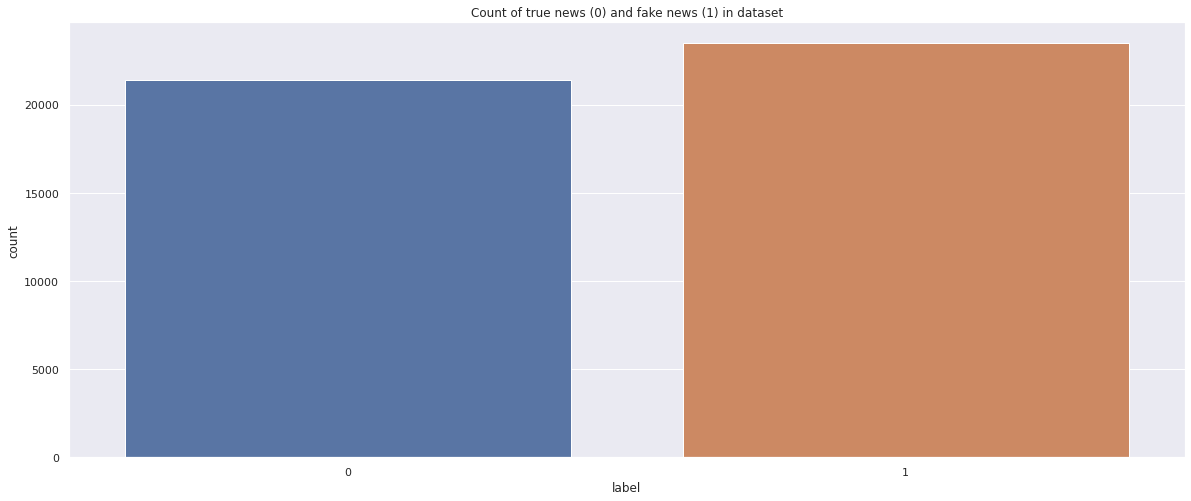

In [ ]:
sns.countplot(df.label)
plt.title('Count of true news (0) and fake news (1) in dataset');

In [ ]:
x = np.array(df['title'])
y = np.array(df['label'])
cv = CountVectorizer()
x = cv.fit_transform(x)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.95
